In [1]:
#import git
!git clone https://github.com/Picovoice/wake-word-benchmark.git

Cloning into 'wake-word-benchmark'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 2449 (delta 1), reused 3 (delta 0), pack-reused 2438
Receiving objects: 100% (2449/2449), 99.11 MiB | 27.16 MiB/s, done.
Resolving deltas: 100% (55/55), done.
Checking out files: 100% (2317/2317), done.


In [0]:
import os
dir="/content/wake-word-benchmark/audio"

In [0]:
alexa=dir+"/"+"alexa"
computer=dir+"/"+"computer"
jarvis=dir+"/"+"jarvis"
smartmirror=dir+"/"+"smart mirror"
snowboy=dir+"/"+"snowboy"
viewglass=dir+"/"+"view glass"

In [0]:
os.listdir(alexa)

['212.flac',
 '53.flac',
 '83.flac',
 '303.flac',
 '116.flac',
 '189.flac',
 '9.flac',
 '323.flac',
 '244.flac',
 '249.flac',
 '155.flac',
 '274.flac',
 '290.flac',
 '260.flac',
 '63.flac',
 '11.flac',
 '146.flac',
 '175.flac',
 '41.flac',
 '220.flac',
 '163.flac',
 '88.flac',
 '28.flac',
 '294.flac',
 '39.flac',
 '184.flac',
 '305.flac',
 '42.flac',
 '156.flac',
 '198.flac',
 '190.flac',
 '69.flac',
 '52.flac',
 '100.flac',
 '291.flac',
 '208.flac',
 '229.flac',
 '232.flac',
 '272.flac',
 '124.flac',
 '258.flac',
 '139.flac',
 '159.flac',
 '312.flac',
 '12.flac',
 '71.flac',
 '67.flac',
 '289.flac',
 '242.flac',
 '287.flac',
 '216.flac',
 '15.flac',
 '72.flac',
 '147.flac',
 '256.flac',
 '248.flac',
 '271.flac',
 '273.flac',
 '140.flac',
 '32.flac',
 '254.flac',
 '328.flac',
 '129.flac',
 '183.flac',
 '118.flac',
 '0.flac',
 '142.flac',
 '119.flac',
 '48.flac',
 '49.flac',
 '98.flac',
 '278.flac',
 '186.flac',
 '181.flac',
 '196.flac',
 '281.flac',
 '112.flac',
 '109.flac',
 '1.flac',

In [4]:
import librosa
audio_path = alexa+"/239.flac"
x , sr = librosa.load(audio_path)
print(type(x), type(sr))
print(x,sr)

<class 'numpy.ndarray'> <class 'int'>
[0. 0. 0. ... 0. 0. 0.] 22050


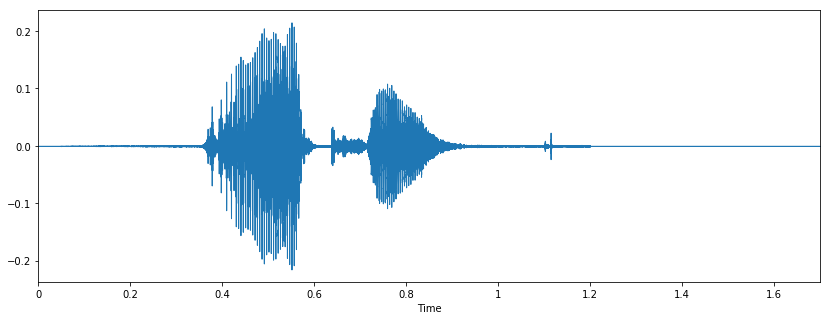

In [5]:
#display waveform
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

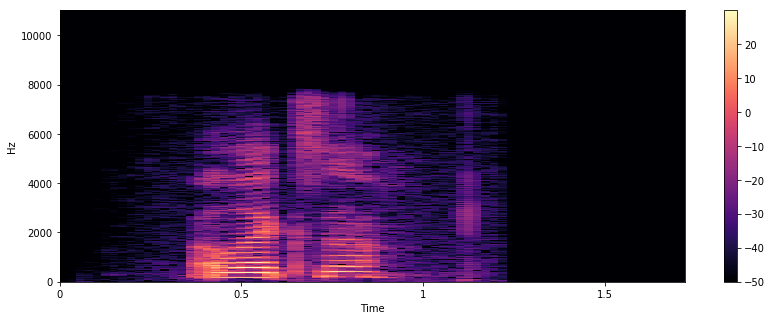

In [0]:
#display Spectrogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

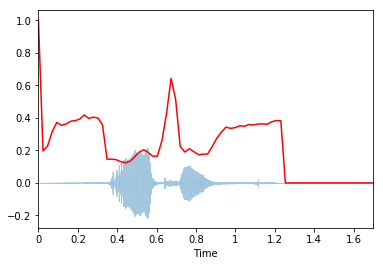

In [0]:
#spectral centroid -- centre of mass -- weighted mean of the frequencies present in the sound
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

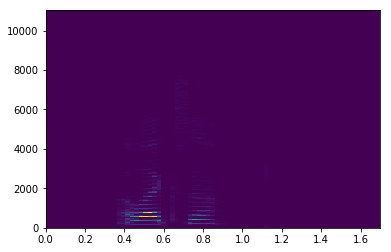

In [6]:
from scipy import signal
import numpy as np
amp = 2 * np.sqrt(2)
f, t, Zxx = signal.stft(x, sr, nperseg=1000)
plt.pcolormesh(t, f, np.abs(Zxx))
plt.show()


In [7]:
Zxx.flatten()

array([ 0.000000e+00+0.j, -4.195991e-17+0.j,  7.619243e-07+0.j, ...,
        0.000000e+00+0.j,  0.000000e+00+0.j,  0.000000e+00+0.j],
      dtype=complex64)

In [0]:
arr=[]
for file in os.listdir(alexa):
  #print(file)
  path=alexa+"/"+file
  #print(path)
  x1 , sr1 = librosa.load(path)
  f, t, Zxx = signal.stft(x1, sr1, nperseg=1000)
  flat=Zxx.flatten()
  arr.append(flat)

  
  

In [0]:
X=np.asarray(arr)

In [10]:
type(X)

numpy.ndarray

In [11]:
X

array([array([-1.9297822e-05+0.j, -4.1239520e-05+0.j, -3.1871132e-05+0.j, ...,
        0.0000000e+00+0.j,  0.0000000e+00+0.j,  0.0000000e+00+0.j],
      dtype=complex64),
       array([-7.0911483e-05+0.j, -5.9551854e-05+0.j, -4.6304918e-05+0.j, ...,
        0.0000000e+00+0.j,  0.0000000e+00+0.j,  0.0000000e+00+0.j],
      dtype=complex64),
       array([ 2.7777489e-06+0.j,  2.3369346e-05+0.j, -4.9625589e-05+0.j, ...,
        0.0000000e+00+0.j,  0.0000000e+00+0.j,  0.0000000e+00+0.j],
      dtype=complex64),
       array([ 0.0000000e+00+0.j, -1.5326399e-05+0.j, -6.0756634e-06+0.j, ...,
        0.0000000e+00+0.j,  0.0000000e+00+0.j,  0.0000000e+00+0.j],
      dtype=complex64),
       array([-5.8826579e-05+0.j, -1.1687319e-04+0.j, -8.4324813e-05+0.j, ...,
        0.0000000e+00+0.j,  0.0000000e+00+0.j,  0.0000000e+00+0.j],
      dtype=complex64),
       array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
      dtype=complex64),
       array([-1.5087004e-07+0.j, -6.9213653e-05+0.j,

In [12]:
for i in arr:
  print (len(i))

69138
49098
62124
57615
72144
34569
48096
56112
42585
64128
49098
40080
42585
53106
83166
65631
64629
48096
73647
57114
51603
45591
41082
64629
51603
84168
38076
38076
42585
42084
38076
44589
40080
39078
59619
93186
71142
84168
71142
75651
117735
66633
42084
67635
58617
70140
29559
46092
45591
59619
78156
47094
54108
88677
46092
58617
113226
34569
36573
56112
50601
40080
64629
55110
60621
39078
42585
50601
78156
45591
40080
55110
39078
58617
62124
40080
80661
40080
46092
54108
57615
42084
51603
81663
41082
40080
39078
37575
60621
63126
42084
55110
64128
57114
115230
58617
60621
81663
64629
49599
74649
53106
45591
42084
61122
69138
74649
58617
65631
51603
53106
58617
58617
52605
40080
46092
61122
73647
48096
46092
70140
55110
43587
42585
70140
73647
42585
59619
55110
42084
61122
33066
64629
101703
62124
41082
56112
125751
46092
42084
37575
49599
64629
40080
55110
57615
38076
50601
83166
51603
59619
55110
64629
41082
53106
44589
66633
57615
51603
60621
65631
55110
44589
52605
34569
61122

In [0]:
arr2=list()
for i in os.listdir(computer):
  audio_path = computer+"/"+i
  x , sr = librosa.load(audio_path)
  f, t, Zxx = signal.stft(x)
  arr2.append(Zxx.flatten())
  

In [0]:
arr3=list()
for i in os.listdir(jarvis):
  audio_path = jarvis+"/"+i
  x , sr = librosa.load(audio_path)
  f, t, Zxx = signal.stft(x)
  arr3.append(Zxx.flatten())
  

In [0]:
arr4=list()
for i in os.listdir(smartmirror):
  audio_path = smartmirror+"/"+i
  x , sr = librosa.load(audio_path)
  f, t, Zxx = signal.stft(x)
  arr4.append(Zxx.flatten())
  

In [0]:
arr5=list()
for i in os.listdir(snowboy):
  audio_path = snowboy+"/"+i
  x , sr = librosa.load(audio_path)
  f, t, Zxx = signal.stft(x)
  arr5.append(Zxx.flatten())
  

In [0]:
arr6=list()
for i in os.listdir(viewglass):
  audio_path = viewglass+"/"+i
  x , sr = librosa.load(audio_path)
  f, t, Zxx = signal.stft(x)
  arr6.append(Zxx.flatten())
  

In [0]:
label=list()

In [0]:
for i in arr:
  label.append([0,0,0,0,0,1])

In [0]:
for i in arr2:
  label.append([0,0,0,0,1,0])

In [0]:
for i in arr3:
  label.append([0,0,0,1,0,0])

In [0]:
for i in arr4:
  label.append([0,0,1,0,0,0])

In [0]:
for i in arr5:
  label.append([0,1,0,0,0,0])

In [0]:
for i in arr6:
  label.append([1,0,0,0,0,0])

In [25]:
len(label)

2293

In [0]:
final=arr+arr2+arr3+arr4+arr5+arr6         #adds all file features in a single list

In [0]:
size=[]
for i in final:
  size.append(len(i))

In [28]:
min(size)

29559

In [0]:
newfinal=list()
for i in final:
    dif = len(i)-29559
    n= dif/2
    newfinal.append(i[int(n):int(len(i)-n)])
  

In [30]:
for i in newfinal:
  print(len(i))

29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
29559
2955

In [0]:
newfinal = np.asarray(newfinal)

In [32]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing import image
from keras.applications.mobilenet import MobileNet
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.models import Model
import timeit

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [0]:
label=np.asarray(label)

In [34]:
label

array([[0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       ...,
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0]])

In [0]:
batch_size = 128
num_classes = 6
epochs = 2



# the data, shuffled and split between train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(newfinal,label, test_size=0.25, random_state=42)

In [38]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(64, activation='relu', kernel_initializer='random_normal', input_dim=29559))
#Second  Hidden Layer
classifier.add(Dense(64, activation='relu', kernel_initializer='random_normal'))

classifier.add(Dense(32, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(6, activation='sigmoid', kernel_initializer='random_normal'))

In [0]:
from keras.optimizers import SGD
opt = SGD(lr=0.01, momentum=0.8)

In [40]:
classifier.compile(optimizer ='rmsprop',loss=keras.losses.categorical_crossentropy, metrics =['accuracy'])

In [41]:
classifier.fit(x_train,y_train, batch_size=100, epochs=50)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/50
1719/1719 [==============================] - 2s 952us/step - loss: 1.7915 - acc: 0.1675
Epoch 2/50
1719/1719 [==============================] - 1s 453us/step - loss: 1.7908 - acc: 0.2059
Epoch 3/50
1719/1719 [==============================] - 1s 462us/step - loss: 1.7884 - acc: 0.1966
Epoch 4/50
1719/1719 [==============================] - 1s 449us/step - loss: 1.7812 - acc: 0.1722
Epoch 5/50
1719/1719 [==============================] - 1s 452us/step - loss: 1.7653 - acc: 0.1722
Epoch 6/50
1719/1719 [==============================] - 1s 454us/step - loss: 1.7345 - acc: 0.1722
Epoch 7/50
1719/1719 [==============================] - 1s 448us/step - loss: 1.6910 - acc: 0.1734
Epoch 8/50
1719/1719 [==============================] - 1s 477us/step - loss: 1.6404 - acc: 0.1786
Epoch 9/50
1719/1719 [==============================] - 1s 455us/step - loss: 1.5855 - acc: 0.2019
Epoch 10/50
17

In [42]:
eval_model=classifier.evaluate(x_train, y_train)
eval_model

1719/1719 [==============================] - 0s 222us/step


[0.7677484591247177, 0.35020360657473926]